## Full Interaction Race Model including a subset of trials with weaker inhibition 


In [57]:
import numpy
import random
import matplotlib.pyplot as plt
import pandas

%matplotlib inline


In [67]:
# original matlab code

#function [meanrtgo,presp] = interactiverace

#rng('shuffle');
params={'mugo':.2,
        'mustopstrong': .8,
        'mustopweak':.0001,
        'threshold':60,
        'nondecisiongo':50,
        'nondecisionstop':50,
        'ssds':[1,50,100,150, 200,250, 300, 350, 400, 450, 500,3000],
        'nreps':50000,
        'maxtime':1000,
        'betastop':.4,
        'betago':.0000001,
        'proportionweak':.15}

def interactiverace(params):
    stopsave = []
    gosave = []
    rtgosave = []
    
    meanrtgo = numpy.zeros(len(params['ssds']))
    presp = numpy.zeros(len(params['ssds']));
 
    for irep in range(params['nreps']):
        for j,ssd in enumerate(params['ssds']):
            stopsignaldelay = ssd
            goaccumulator = 0
            stopaccumulator = 0
            rtgo = 0
            itime = 0
            if random.uniform(0,1) < params['proportionweak']:
                mustop = params['mustopweak']
#                mustopVar = numpy.random.normal()*.008
            else: 
                mustop = params['mustopstrong']
#                mustopVar = numpy.random.normal()
            while itime < params['maxtime'] and rtgo == 0: # single trial
                itime = itime + 1
                if itime < stopsignaldelay + params['nondecisionstop']:
                    inhibition = 0
                else:
                    inhibition = params['betastop']
                    if mustop == params['mustopweak']:
                        stopaccumulator = stopaccumulator + mustop + numpy.random.normal()*.008 - params['betago']*goaccumulator
                    else: 
                        stopaccumulator = stopaccumulator + mustop + numpy.random.normal() - params['betago']*goaccumulator 
                    stopsave.append(stopaccumulator)
                    #print(stopaccumulator)
                if itime >= params['nondecisiongo']:
                    goaccumulator = goaccumulator + params['mugo'] - inhibition*stopaccumulator + numpy.random.normal()
                    gosave.append(goaccumulator)
                if goaccumulator > params['threshold']:
                    if rtgo == 0:
                        rtgo = itime;
            meanrtgo[j] += rtgo;
            rtgosave.append(rtgo)
            if rtgo > 0:
                presp[j] += 1;

    for ssd in range(len(params['ssds'])):
        if presp[ssd] > 0:
            meanrtgo[ssd] = meanrtgo[ssd]/presp[ssd];
        presp[ssd] = presp[ssd]/params['nreps'];
    return(meanrtgo,presp,gosave,stopsave,rtgosave)

meanrtgo,presp,gosave,stopsave,rtgosave=interactiverace(params)
#df=pandas.DataFrame({'gosave':gosave,'stopsave':stopsave})
print(meanrtgo)
print(presp)

[370.37489813 368.43665839 363.22918904 349.68955739 309.66957489
 295.42629791 305.81508298 320.46801773 332.86002107 341.46538518
 346.20917198 351.93198   ]
[0.14724 0.15298 0.14896 0.16222 0.23382 0.4122  0.62428 0.7895  0.89242
 0.94786 0.97776 1.     ]


[1, 500, 0, 1]

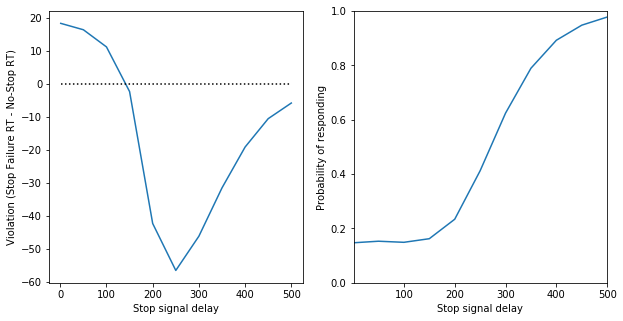

In [68]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(params['ssds'][:11],meanrtgo[:11] - meanrtgo[11])
plt.plot([params['ssds'][0],params['ssds'][10]],[0,0],'k:')
plt.xlabel('Stop signal delay')
plt.ylabel('Violation (Stop Failure RT - No-Stop RT)')
plt.subplot(1,2,2)
plt.plot(params['ssds'][:11],presp[:11])
plt.xlabel('Stop signal delay')
plt.ylabel('Probability of responding')
plt.axis([params['ssds'][0],params['ssds'][10],0,1])